# 1.5: Text Mining

## Table of Contents
### 1. Importing Libraries
### 2. Tokenization
### 3. Stopwords
### 4. POS Tags with TextBlob
        Nouns
        Verbs
        Adjectives
### 5. Counting country occurences
### 6. Sentiment Analysis
        Expectation
        Analysis

### 1. Importing Libraries

In [1]:
# Import TextBlob and related functions
from textblob import TextBlob, download_corpora

# Import data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import NLTK and regex utilities
import nltk
import re
from collections import Counter  # For counting word frequencies

# Download required NLTK corpora
nltk.download('stopwords')  # Download stopwords for filtering common words
nltk.download('punkt')  # Tokenizer for breaking text into sentences and words
nltk.download('punkt_tab')  # Supporting files for punkt tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagger for text analysis
nltk.download('averaged_perceptron_tagger_eng')  # Enhanced POS tagger for English

# Set default Seaborn plot aesthetics
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


I have updated the library import for a cleaner visual. I also added in 'punkt_tab' and 'averaged_perceptron_tagger_eng' based on the updates made during the lecture.

In [2]:
# loading the '20th_century_article_Wiki' txt file

# Import txt file

with open('20th_century_article_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

### 2. Tokenization

In [3]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2Russian', 'Revolution', 'and', 'communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 

In [5]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4815 samples and 20993 outcomes>


In [6]:
# pulling the 10 most common words

dist_words.most_common(10)

[('.', 1275),
 ('the', 1099),
 (',', 963),
 ('of', 604),
 ('and', 398),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('The', 300),
 ('in', 291)]

##### Discussion

- The punctuation tokens contribute to four of the ten most common and do not mean much. They will be filtered out later in the script.
- Next are stopwords, which do not contribute much to the analysis and will be filtered out later in the script.
- Next would be 'the' and 'The'. They are treated as distinct tokens because of case sensitivity.

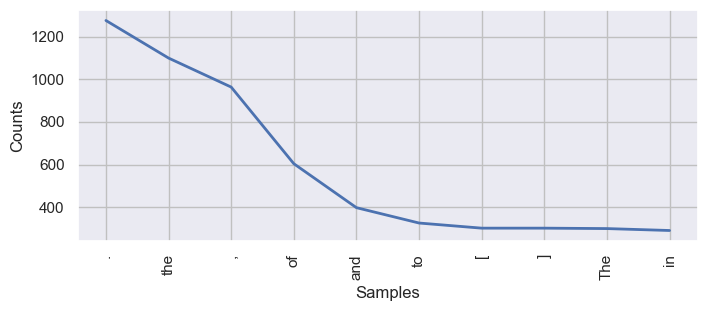

In [7]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

As stated above, this initial analysis does not provide insight and will continue to be refined.

### 3. Stopwords

In [8]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'once', 'at', 'very', 'under', "won't", "shan't", 'such', 'or', 'were', 'she', 'all', "it's", 'then', 'which', "she's", 'in', 'isn', 'is', 'most', "don't", 'it', "isn't", 'until', 'by', "hadn't", 'shan', "wouldn't", 'only', 'before', 'itself', 'her', 'further', 'ours', 'each', 'now', 'but', 'd', "haven't", 'hadn', 'am', "shouldn't", 'are', "wasn't", 'yourself', 'into', "you'll", 'just', 'himself', "couldn't", 'me', 'has', 're', 'if', 'they', 'as', 'y', 'than', 'that', 'ourselves', 'of', 'him', 'so', 'down', 'where', 'haven', 'themselves', "you're", 'an', 'having', 'few', 'same', 'didn', 'will', 'between', 'again', 'ma', 'theirs', 'to', 'no', 'should', 'wasn', 'with', 'some', 'won', 'whom', 'myself', 'what', 'herself', 'being', 'there', 'do', 'you', 'during', "should've", 'be', 'the', 'couldn', 'off', 'our', 'above', 'hasn', "mightn't", 'was', 'm', 'and', 'yourselves', 'from', "that'll", 'other', 'your', 'been', 'them', "you've", 'both', 'this', "hasn't", 'against', "needn't", 'i', 'mi

In [9]:
# Convert words to lowercase and remove stopwords

filtered_words = []  # Create an empty list
for word in tokenized_word:
    word_lower = word.lower()  # Convert word to lowercase
    if word_lower not in stop_words:
        filtered_words.append(word_lower)

I converted all words to lowercase to prevent duplicates such as "War" and "war.

In [10]:
filtered_words

['key',
 'events',
 '20th',
 'century',
 '-',
 'wikipediajump',
 'contentmain',
 'menumain',
 'menumove',
 'sidebarhide',
 'navigation',
 'main',
 'pagecontentscurrent',
 'eventsrandom',
 'articleabout',
 'wikipediacontact',
 'us',
 'contribute',
 'helplearn',
 'editcommunity',
 'portalrecent',
 'changesupload',
 'filesearchsearchappearancedonatecreate',
 'accountlog',
 'inpersonal',
 'toolsdonate',
 'create',
 'account',
 'log',
 'pages',
 'logged',
 'editors',
 'learn',
 'morecontributionstalkcontentsmove',
 'sidebarhide',
 '(',
 'top',
 ')',
 '1historic',
 'events',
 '20th',
 'centurytoggle',
 'historic',
 'events',
 '20th',
 'century',
 'subsection1.1world',
 'beginning',
 'century1.1.1',
 "''",
 'war',
 'end',
 'wars',
 "''",
 ':',
 'world',
 'war',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2russian',
 'revolution',
 'communism1.2between',
 'wars1.2.1economic',
 'depression1.2.2the',
 'rise',
 'dictatorship1.3global',
 'war',
 ':',
 'world',
 'war',
 'ii',
 '(',
 '1939â€',
 '“',

In [11]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4212 samples and 15698 outcomes>


In [12]:
# pulling the 10 most common distinct words

dist_words_filter.most_common(10)

[('.', 1275),
 (',', 963),
 ('[', 302),
 (']', 302),
 ("''", 279),
 ('``', 273),
 ('(', 243),
 (')', 243),
 ('december', 222),
 ('retrieved', 205)]

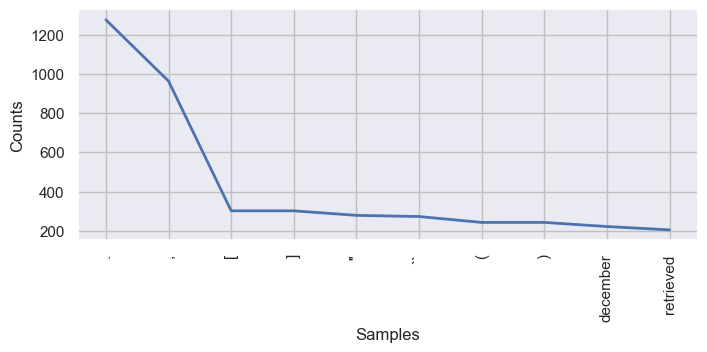

In [13]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

##### Discussion

- The output above contains a high amount of punctuation meaning I will need to remove the punctuation marks and the remaining stopword.
- The month of 'December' suggests important events happened in this month. To note, the Pearl Harbor attack occurred on December 7, 1941. This was the event that brought the US fully into WW2.

In [14]:
# Substitute all punctuation marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [15]:
sans_punc

'  key    events      th    century         wikipediajump    contentmain    menumain    menumove    sidebarhide    navigation    main    pagecontentscurrent    eventsrandom    articleabout    wikipediacontact    us    contribute    helplearn    editcommunity    portalrecent    changesupload    filesearchsearchappearancedonatecreate    accountlog    inpersonal    toolsdonate    create    account    log    pages    logged    editors    learn    morecontributionstalkcontentsmove    sidebarhide         top          historic    events      th    centurytoggle    historic    events      th    century    subsection   world    beginning    century               war    end    wars               world    war                                          russian    revolution    communism   between    wars     economic    depression     the    rise    dictatorship   global    war         world    war    ii                                          the    war    europe     blitzkrieg     operation    ba

In [16]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['key', 'events', 'th', 'century', 'wikipediajump', 'contentmain', 'menumain', 'menumove', 'sidebarhide', 'navigation', 'main', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact', 'us', 'contribute', 'helplearn', 'editcommunity', 'portalrecent', 'changesupload', 'filesearchsearchappearancedonatecreate', 'accountlog', 'inpersonal', 'toolsdonate', 'create', 'account', 'log', 'pages', 'logged', 'editors', 'learn', 'morecontributionstalkcontentsmove', 'sidebarhide', 'top', 'historic', 'events', 'th', 'centurytoggle', 'historic', 'events', 'th', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'world', 'war', 'russian', 'revolution', 'communism', 'between', 'wars', 'economic', 'depression', 'the', 'rise', 'dictatorship', 'global', 'war', 'world', 'war', 'ii', 'the', 'war', 'europe', 'blitzkrieg', 'operation', 'barbarossa', 'turning', 'tides', 'operation', 'overlord', 'final', 'days', 'the', 'war', 'pacific', 'background', 'japanese', 'ex

In [17]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

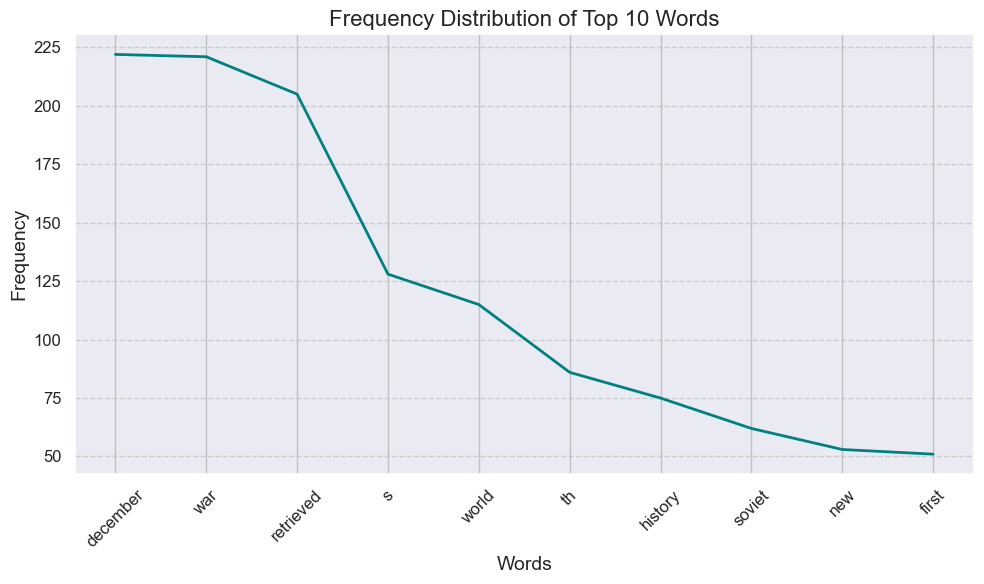

In [18]:
# Frequency Distribution Plot
plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
dist_words_filter_2.plot(10, cumulative=False, color='teal', title='Top 10 Most Frequent Words')  # Adding title and color

# adding labels and title
plt.title('Frequency Distribution of Top 10 Words', fontsize=16)  # Setting title with larger font
plt.xlabel('Words', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# enhancing axis ticks
plt.xticks(fontsize=12, rotation=45)  # Rotating x-axis labels for better readability
plt.yticks(fontsize=12)

# adding a grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [19]:
dist_words_filter_2.most_common(10)

[('december', 222),
 ('war', 221),
 ('retrieved', 205),
 ('s', 128),
 ('world', 115),
 ('th', 86),
 ('history', 75),
 ('soviet', 62),
 ('new', 53),
 ('first', 51)]

##### Discussion
- There appears to be a heavy focus on WW1 and WW2, along with the involvement of the Soviet Union.
- The mention of 'Hitler' directly ties to WW2, Nazi Germany, and the Holocaust.
- The repeated mention of 'December' suggests there were many historical connections in this month. For example, the attack on Pearl Harbor (December 1941).
- 's' and 'th' are likely grammatical fragments such as possessive forms.
- 'retrieved' means that the text is sourced from Wikipedia (which it is), and should be removed in the analysis.

### 4. POS Tags with TextBlob

In [20]:
new_stopwords = ["the", "retrieved", "s", "th", "www", "isbn", "u"]

In [21]:
# removing unwanted words from 'tokenized_word_2'

filtered = []
for word in tokenized_word_2:
    if word.isalpha() and word not in new_stopwords:
        filtered.append(word)

In [22]:
%%time
# converting 'filtered' to a string, which will allow for POS tagging
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 8.72 ms


In [23]:
text

TextBlob("['key', 'events', 'century', 'wikipediajump', 'contentmain', 'menumain', 'menumove', 'sidebarhide', 'navigation', 'main', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact', 'us', 'contribute', 'helplearn', 'editcommunity', 'portalrecent', 'changesupload', 'filesearchsearchappearancedonatecreate', 'accountlog', 'inpersonal', 'toolsdonate', 'create', 'account', 'log', 'pages', 'logged', 'editors', 'learn', 'morecontributionstalkcontentsmove', 'sidebarhide', 'top', 'historic', 'events', 'centurytoggle', 'historic', 'events', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'world', 'war', 'russian', 'revolution', 'communism', 'between', 'wars', 'economic', 'depression', 'rise', 'dictatorship', 'global', 'war', 'world', 'war', 'ii', 'war', 'europe', 'blitzkrieg', 'operation', 'barbarossa', 'turning', 'tides', 'operation', 'overlord', 'final', 'days', 'war', 'pacific', 'background', 'japanese', 'expansion', 'allied', 'offensiv

In [24]:
# extracting POS tags

tags_list = text.tags

In [25]:
tags_list

[('[', 'JJ'),
 ("'key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'wikipediajump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'navigation", 'NN'),
 ("'pagecontentscurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsrandom", 'NNP'),
 ("'", 'POS'),
 ("'articleabout", 'IN'),
 ("'wikipediacontact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'helplearn", 'NNP'),
 ("'", 'POS'),
 ("'editcommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalrecent", 'NNP'),
 ("'", 'POS'),
 ("'filesearchsearchappearancedonatecreate", 'NNP'),
 ("'", 'POS'),
 ("'accountlog", 'NNP'),
 ("'", 'POS'),
 ("'inpersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsdonate", 'NNP'),
 ("'", 'POS'),
 ("'create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'log", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 ("'learn", 'NNP'),
 ("'", 

In [26]:
# converting 'tags_list' to a dataframe
df_text = pd.DataFrame(tags_list)

# assigning column names
df_text.columns = ['Words', "Word type"]

In [27]:
df_text.head()

,Words,Word type
0,[,JJ
1,'key,NNP
2,',POS
3,'events,NNS
4,',POS


In [28]:
# grouping 'df_text' by the word type and count the number of occurrences of each word type

df_t = df_text.groupby('Word type').count().reset_index()

In [29]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,77
2,DT,13
3,EX,6
4,FW,40


In [30]:
# returning the top 10 word groups

top10 = df_t.nlargest(10, 'Words')

In [31]:
top10

,Word type,Words
13,POS,6441
11,NNP,5152
12,NNS,1037
16,VBD,647
10,NN,427
17,VBG,317
6,JJ,281
5,IN,140
15,RB,140
1,CD,77


C:\Users\HP\AppData\Local\Temp\ipykernel_29648\1012805211.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)


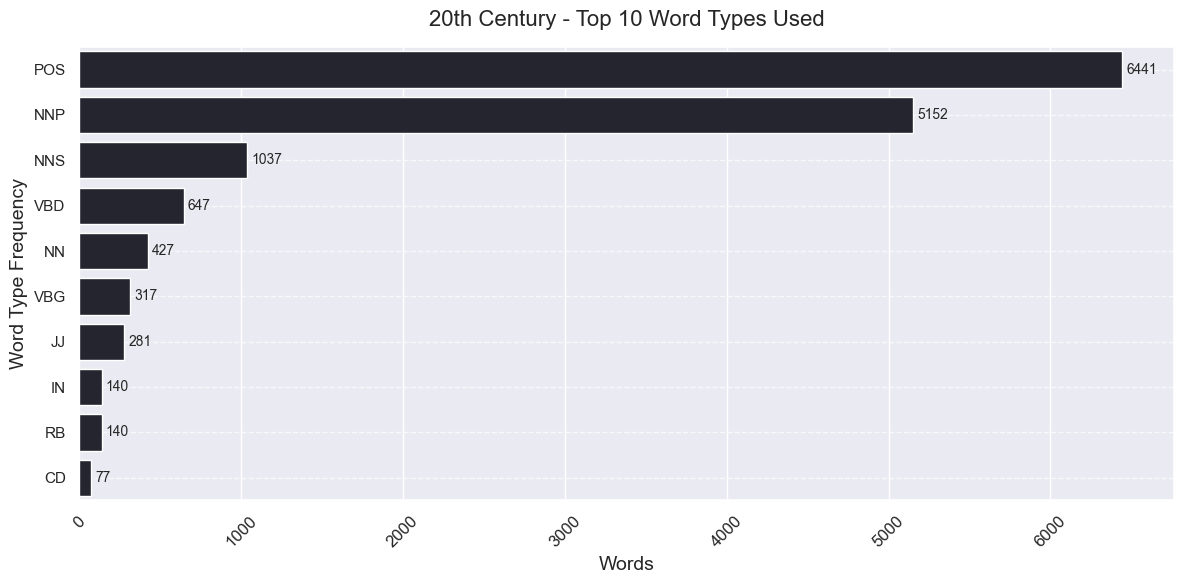

In [32]:
# Plotting on a bar chart
plt.figure(figsize=(12, 6))  # Increase figure size for better clarity

# Create the barplot
with sns.dark_palette("xkcd:blue", 10):
    ax = sns.barplot(
        x="Words", 
        y="Word type", 
        saturation=0.9, 
        data=top10
    )
    
# Set title and labels
ax.set_title("20th Century - Top 10 Word Types Used", fontsize=16, pad=15)
ax.set_xlabel("Words", fontsize=14)
ax.set_ylabel("Word Type Frequency", fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

# Annotate bars with their respective frequencies
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tighten layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

##### Discussion
The top 10 word types reflects an article that focuses on recounting specific historical events, actions, and narratives. There is a structured and descriptive style that emphasizes clarity throughout the article. This aligns with the wikipedia page showing an accurate analysis of the top 10 word types.

#### Nouns

In [33]:
df_nouns = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")] # filtering rows by word type 
df_nouns.columns = ["Word", "Occurences"] # renaming columns
x = df_nouns.groupby('Word').count().reset_index() # grouping and counting words
y = x.sort_values(by = ['Occurences'], ascending=False) # sorting words by 'Occurences'
top10_nouns = y.nlargest(10, 'Occurences') # extracting the top 10 nouns

In [34]:
top10_nouns

,Word,Occurences
497,'december,222
2180,'war,221
2235,'world,115
944,'history,75
1909,'soviet,62
1414,'new,53
764,'first,51
949,'hitler,50
318,'century,43
168,'battle,39


C:\Users\HP\AppData\Local\Temp\ipykernel_29648\3006184992.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)


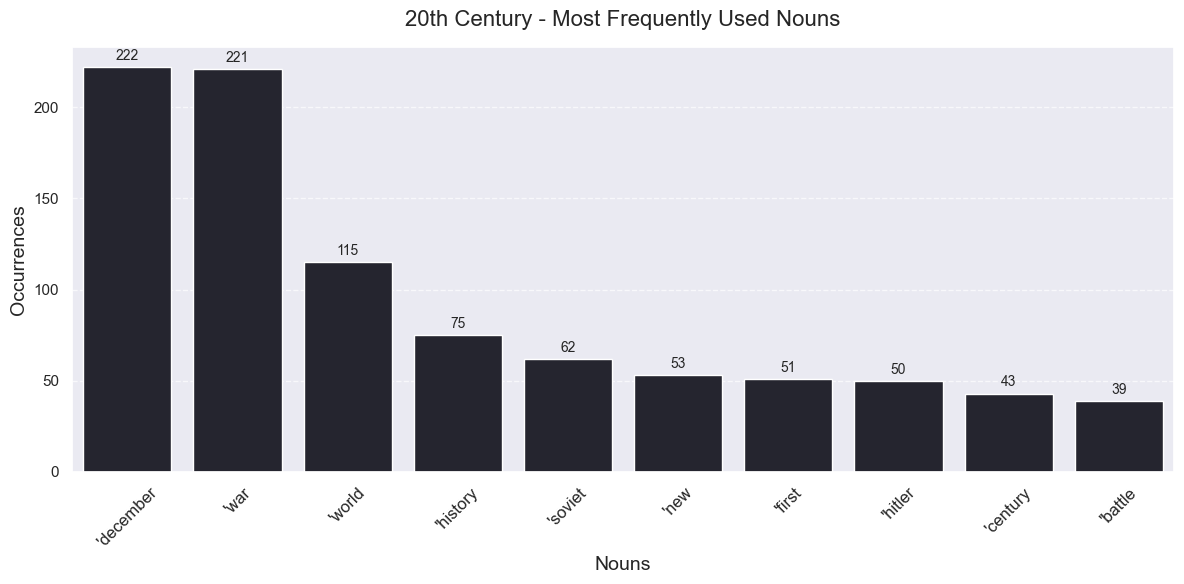

In [35]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create the barplot
with sns.dark_palette("xkcd:blue", 10):
    ax = sns.barplot(
        x="Word", 
        y="Occurences", 
        saturation=0.9, 
        data=top10_nouns
    )

# Set title and axis labels
ax.set_title("20th Century - Most Frequently Used Nouns", fontsize=16, pad=15)
ax.set_xlabel("Nouns", fontsize=14)
ax.set_ylabel("Occurrences", fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

# Annotate bars with their respective counts
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add gridlines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

##### Discussion
- There is a focus on WW2, specifically Soviet Untion and Hitler.
- There was much discussion of December and battles that occurred throughout the century.
- War and geopolitical shifts are dominant themes in the article.

#### Verbs

In [36]:
df_verbs = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")] # filtering rows by word type
df_verbs.columns = ["Word", "Occurences"] # renaming columns
x = df_verbs.groupby('Word').count().reset_index() # grouping and counting words
y = x.sort_values(by = ['Occurences'], ascending=False) # sorting by 'Occurences'
top10_verbs = y.nlargest(10, 'Occurences') # extracting top 10 verbs

In [37]:
top10_verbs

,Word,Occurences
289,'united,30
8,'allied,21
165,'led,15
293,'used,13
13,'archived,13
162,'launched,12
58,'controlled,9
41,'changed,8
201,'planned,8
127,'forced,8


C:\Users\HP\AppData\Local\Temp\ipykernel_29648\2344021887.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)


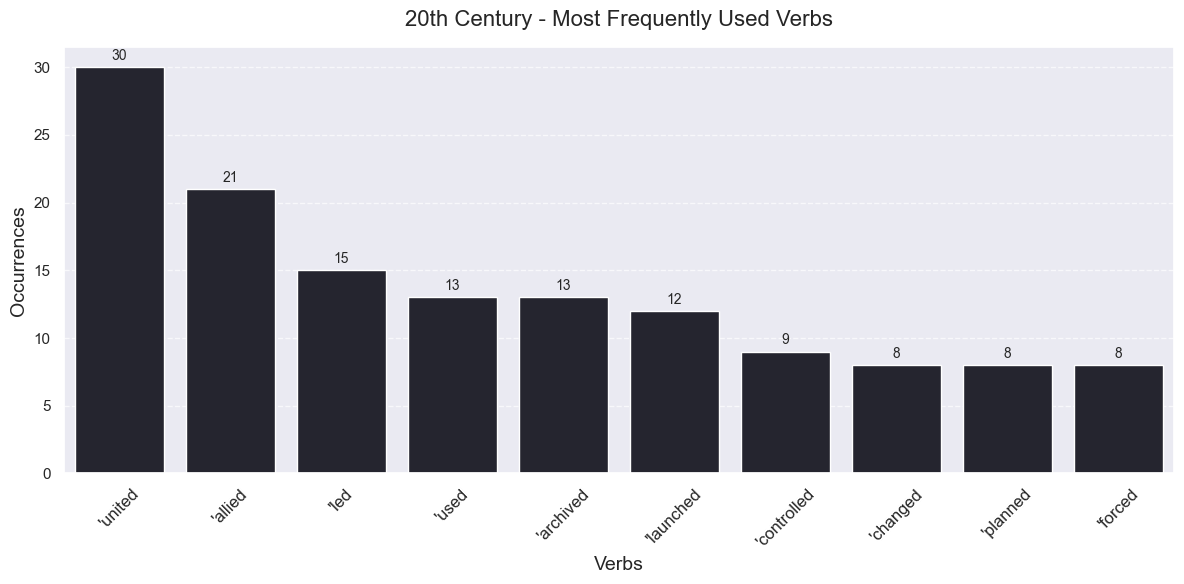

In [38]:
plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability

# Create the barplot with an enhanced aesthetic
with sns.dark_palette("xkcd:blue", 10):
    ax = sns.barplot(
        x="Word", 
        y="Occurences", 
        saturation=0.9, 
        data=top10_verbs
    )

# Add title and axis labels
ax.set_title("20th Century - Most Frequently Used Verbs", fontsize=16, pad=15)
ax.set_xlabel("Verbs", fontsize=14)
ax.set_ylabel("Occurrences", fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure the layout is adjusted to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

##### Discussion
- The amount of 'united' and 'allied' suggests a focus on collaboration, likely among nations. This aligns well with the article, since there were created alliances during wartime.
- 'united' could also refer to the United States
- 'led' and 'planned' imply leadership roles and strategic decisions, probably in a military or political context.
- 'launched' could indicate references to technology such as the space race.
- 'controlled' and 'forced' show themes of domination emphasizing military maneuvers and conflict resolution.

#### Adjectives

In [39]:
df_adjectives = df_text[df_text['Word type'] == "JJ"] # filtering rows by word type
df_adjectives.columns = ["Word", "Occurences"] # renaming columns
x = df_adjectives.groupby('Word').count().reset_index() # grouping and counting words
y = x.sort_values(by=['Occurences'], ascending=False) # sorting by 'Occurences'
top10_adjectives = y.nlargest(10, 'Occurences') # extracting top 10 adjectives

In [40]:
top10_adjectives

,Word,Occurences
55,'japanese,36
4,'american,24
10,'atlantic,13
43,'guardian,10
79,'political,9
23,'chinese,7
3,'african,6
89,'russian,6
67,'much,6
15,'baltic,5


C:\Users\HP\AppData\Local\Temp\ipykernel_29648\726061319.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)


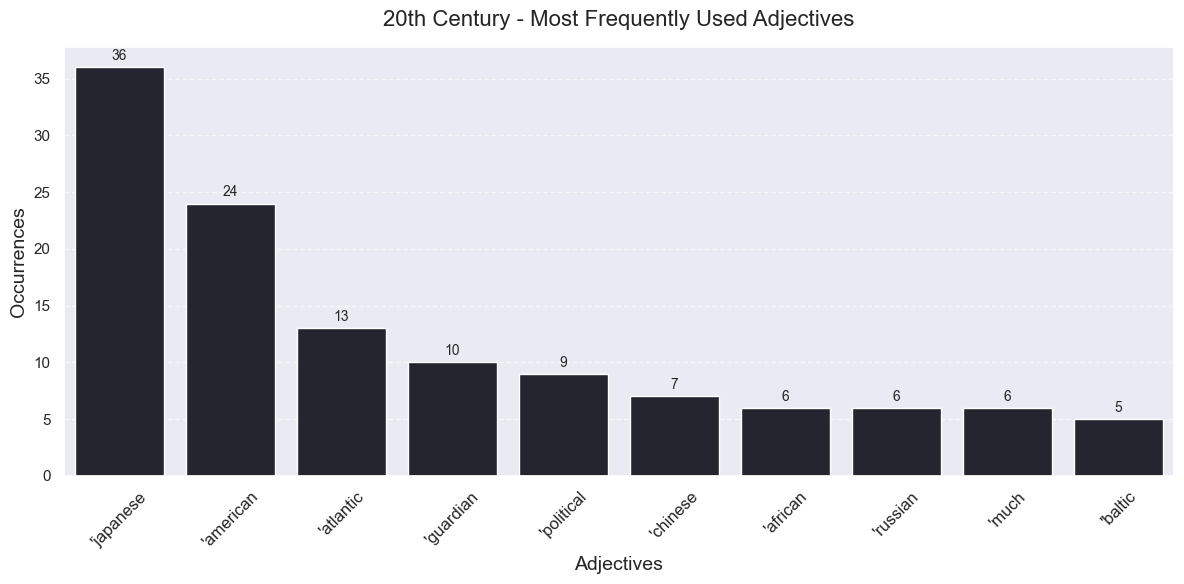

In [41]:
plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability

# Create the barplot with an enhanced aesthetic
with sns.dark_palette("xkcd:blue", 10):
    ax = sns.barplot(
        x="Word", 
        y="Occurences", 
        saturation=0.9, 
        data=top10_adjectives
    )

# Add title and axis labels
ax.set_title("20th Century - Most Frequently Used Adjectives", fontsize=16, pad=15)
ax.set_xlabel("Adjectives", fontsize=14)
ax.set_ylabel("Occurrences", fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure the layout is adjusted to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

##### Discussion
- 'japanese', 'american, 'chinese', 'african', 'russian', and 'baltic' suggest there are discussion of international relations or conflicts.
- The mention of 'political' shows a focus on governance and the politics tied to historical events or global interactions.
- 'atlantic' probably points to discussions about the atlantic region including war, trade, or alliances (NATO).
- 'guardian' is an interesting one here, this should probably be explored further.

### 5. Counting country occurences

In [42]:
# combine the list of words into a single string
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

key events century wikipediajump contentmain menumain menumove sidebarhide navigation main pagecontentscurrent eventsrandom articleabout wikipediacontact us contribute helplearn editcommunity portalrecent changesupload filesearchsearchappearancedonatecreate accountlog inpersonal toolsdonate create account log pages logged editors learn morecontributionstalkcontentsmove sidebarhide top historic events centurytoggle historic events century subsection world beginning century war end wars world war russian revolution communism between wars economic depression rise dictatorship global war world war ii war europe blitzkrieg operation barbarossa turning tides operation overlord final days war pacific background japanese expansion allied offensive final days holocaust nuclear age begins post war world end empires decolonization cold war war proxy space race end cold war information communications technology world end century see also references sources external linkstoggle table contentskey ev

In [43]:
# importing countries file

countries = pd.read_csv("countries_list_20th_century_1.5.csv", header = 0)

In [44]:
# cleaning the 'country_name' column: remove spaces and convert to lowercase

countries['country_name'] = countries['country_name'].str.strip().str.lower()

In [45]:
# replace names with shortened names

countries['country_name'] = countries['country_name'].replace("bahamas, the", "bahamas")
countries['country_name'] = countries['country_name'].replace("china, people's republic of", "china")
countries['country_name'] = countries['country_name'].replace("congo, democratic republic of the", "congo")
countries['country_name'] = countries['country_name'].replace("congo, republic of the", "congo")
countries['country_name'] = countries['country_name'].replace("gambia, the", "gambia")
countries['country_name'] = countries['country_name'].replace("korea, north", "north korea")
countries['country_name'] = countries['country_name'].replace("korea, south", "south korea")
countries['country_name'] = countries['country_name'].replace("micronesia, federated states of", "micronesia")
countries['country_name'] = countries['country_name'].replace("vatican city (holy see)", "vatican city")
countries['country_name'] = countries['country_name'].replace("donetsk people's republic", "donetsk")
countries['country_name'] = countries['country_name'].replace("luhansk people's republic", "luhansk")
countries['country_name'] = countries['country_name'].replace("sahrawi arab democratic republic", "sahrawi")

In [46]:
# converting countries dataframe to list

country_list = countries['country_name'].to_list()

In [47]:
country_list

['afghanistan',
 'albania',
 'algeria',
 'andorra',
 'angola',
 'antigua',
 'barbuda',
 'argentina',
 'armenia',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bhutan',
 'bolivia',
 'bosnia',
 'herzegovina',
 'botswana',
 'brazil',
 'brunei',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cambodia',
 'cameroon',
 'canada',
 'cape verde',
 'central african republic',
 'chad',
 'chile',
 'china',
 'colombia',
 'comoros',
 'congo',
 'congo',
 'costa rica',
 'croatia',
 'cuba',
 'cyprus',
 'czech republic',
 'denmark',
 'djibouti',
 'dominica',
 'dominican republic',
 'east timor',
 'ecuador',
 'egypt',
 'el salvador',
 'equatorial guinea',
 'eritrea',
 'estonia',
 'eswatini',
 'ethiopia',
 'fiji',
 'finland',
 'france',
 'gabon',
 'gambia',
 'georgia',
 'germany',
 'ghana',
 'greece',
 'grenada',
 'guatemala',
 'guinea',
 'guinea',
 'bissau',
 'guyana',
 'haiti',
 'honduras',
 'hungary',
 'iceland',


In [48]:
# initialize a Counter

country_counts = Counter()

In [49]:
# check for each country in the 20th_century text

for country in country_list:
    # Use regex to find the exact match of the country name
    matches = re.findall(r'\b' + re.escape(country) + r'\b', listToStr)
    country_counts[country] += len(matches)

In [50]:
# convert the Counter to a DataFrame

country_counts_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Times mentioned']).reset_index()
country_counts_df.rename(columns={'index': 'Country'}, inplace=True)

In [51]:
# filter the DataFrame to show only countries with mentions > 0

filtered_country_counts_df = country_counts_df[country_counts_df['Times mentioned'] > 0]

In [52]:
# display the results

print(filtered_country_counts_df)

            Country  Times mentioned
0       afghanistan                1
1           albania                2
2           algeria                1
4            angola                1
9         australia                2
..              ...              ...
176        thailand                1
186         ukraine                2
188  united kingdom                2
189   united states               23
195         vietnam               13

[68 rows x 2 columns]


In [54]:
# saving the results as a CSV

filtered_country_counts_df.to_csv("filtered_country_counts.csv", index=False)

In [55]:
# ensure the DataFrame is sorted by "Times mentioned"

sorted_country_counts_df = filtered_country_counts_df.sort_values("Times mentioned", ascending=False)

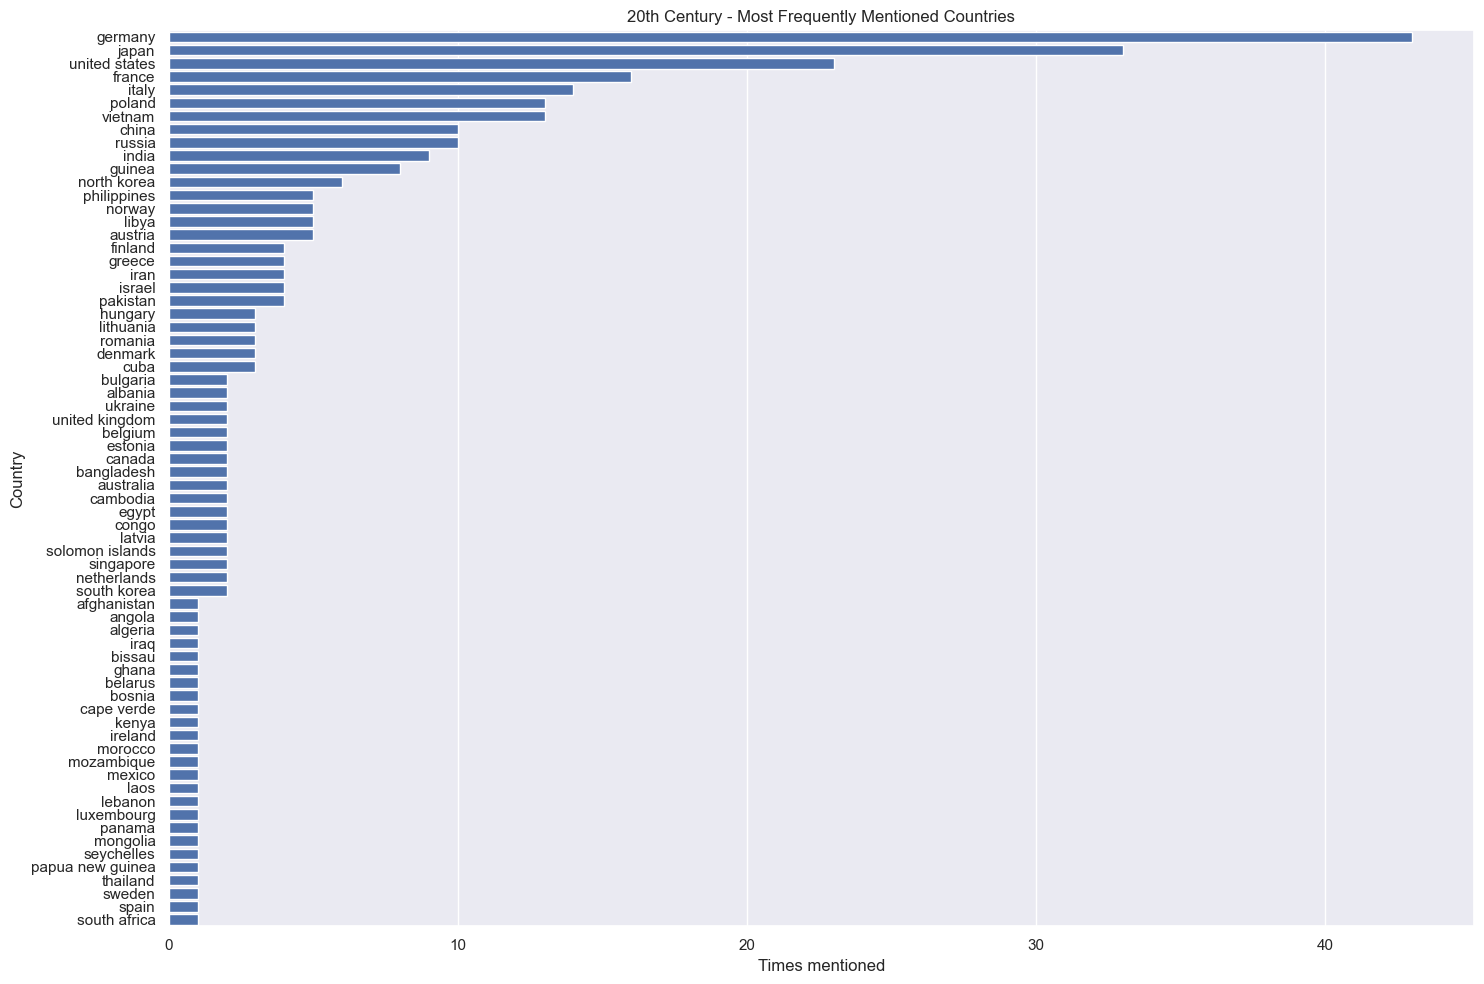

In [56]:
# ensure the DataFrame is sorted by "Times mentioned"
sorted_country_counts_df = filtered_country_counts_df.sort_values("Times mentioned", ascending=False)

# create the barplot
plt.figure(figsize=(15, 10))
sns.barplot(
    x="Times mentioned",
    y="Country",
    data=sorted_country_counts_df,
    saturation=0.9
).set_title("20th Century - Most Frequently Mentioned Countries")

# adjust layout to prevent overlapping
plt.tight_layout()

# show the plot
plt.show()

##### Discussion
- The promiment players of the 20th century are Germany, Japan, and the United States. These countries were heavily involved in both of the World Wars.
- Countries like Vietnam, China, Russia, and North Korea appear heavily, which aligns with the events during the Cold War.
- There are a handful of mentions of Guinea, where decolonization movements are discussed.
- The presence of middle-eastern countries (India, Iran, Israel) show that regional conflicts occurred in the 20th century.
- The European and Asian country mentions further show the importance of these areas in the 20th Century, especially during the world wars.

The code below reflects my first version of trying to count the countries in the text. I am keeping this for future reference. 

In [57]:
# # create a count for all words in the text

# all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [58]:
# all_counts

In [59]:
# importing countries file

# countries = pd.read_csv("countries_list_20th_century_1.5.csv", header = 0)

In [60]:
# cleaning the 'country_name' column: remove spaces and convert to lowercase

# countries['country_name'] = countries['country_name'].str.strip().str.lower()

In [61]:
# countries.head()

In [62]:
# print(countries.columns)

In [63]:
# replace names with aliases

#countries['country_name'] = countries['country_name'].replace("bahamas, the", "bahamas")
# countries['country_name'] = countries['country_name'].replace("china, people's republic of", "china")
# countries['country_name'] = countries['country_name'].replace("congo, democratic republic of the", "congo")
# countries['country_name'] = countries['country_name'].replace("congo, republic of the", "congo")
# countries['country_name'] = countries['country_name'].replace("gambia, the", "gambia")
# countries['country_name'] = countries['country_name'].replace("korea, north", "north korea")
# countries['country_name'] = countries['country_name'].replace("korea, south", "south korea")
# countries['country_name'] = countries['country_name'].replace("micronesia, federated states of", "micronesia")
# countries['country_name'] = countries['country_name'].replace("vatican city (holy see)", "vatican city")
# countries['country_name'] = countries['country_name'].replace("donetsk people's republic", "donetsk")
# countries['country_name'] = countries['country_name'].replace("luhansk people's republic", "luhansk")
# countries['country_name'] = countries['country_name'].replace("sahrawi arab democratic republic", "sahrawi")

In [64]:
# converting countries dataframe to list

# country_list = countries['country_name'].to_list()

In [65]:
# country_list

In [66]:
# # creating a dictionary of country_list

# dict_of_counts = {d : all_counts[d] for d in country_list}

In [67]:
# dict_of_counts

In [68]:
# # Search for the names from the list in the dictionary

# dct = {v:[k] for v,k in dict_of_counts.items()}  
# df = pd.DataFrame(dct)

In [69]:
# df

In [70]:
# # transposing dataframe and resetting index

# df = df.transpose().reset_index()

In [71]:
# df.dtypes

In [72]:
# # updating dataframe

# df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [73]:
# df

In [74]:
# df.shape

In [75]:
# # filter the DataFrame to include only rows where 'Times mentioned' > 0

# filtered_df = df[df['Times mentioned'] > 0]

In [76]:
# # Create the barplot
# plt.figure(figsize=(15, 10))
# with sns.dark_palette("#79C", 27):
#     sns.barplot(
#         x="Times mentioned",
#         y="Country",
#         saturation=0.9,
#         data=filtered_df.sort_values("Times mentioned", ascending=False)
#     ).set_title("20th Century - Most Frequently Mentioned Countries")

# # Show the plot
# plt.tight_layout()
# plt.show()

### 6. Sentiment Analysis

#### Discussion
- Polarity: I am expecting a value around 0 because historical texts should aim for factual reporting rather than emotional tones.
- Subjectivity: I am expecting a value closer to 0 since it is a factual text without opinions or commentary.

#### Analysis

In [77]:
text_sent = TextBlob(str(filtered))

In [78]:
print(text_sent.sentiment)

Sentiment(polarity=0.04774113329787384, subjectivity=0.3540684763189025)


##### Discussion
- **Polarity: 0.0477 - Slightly Positive:**
    The text leans slightly positive, but closer to neutral. This is possibly due to the struggles and achievements of the 20th century, striking a balance.
- I am not surprised by these results. I would expect the polarity to be mostly neutral. If it were to reflect a more positive or negative sentiment, I would question the credibility of the sourced material and suggest pulling text from a more qualified source without any type of bias.
- **Subjectivity: 0.3541 - Moderately Subjective:**
    This range suggests some interpretive language, such as how the events were characterized or attributing motives behind some events.
- I am surprised by how moderately subjective this material is, indicating some opinions were a little too strongly expressed in the text. I wonder if the author unintentionally included subjective phrasing that was analyzed by the Textblob subjectivity algorithm.